# Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

В качестве набора данных мы будем использовать набор данных :
Этот набор данных о грибах для двоичной классификации. Он содержит 9 столбцов:


1.   Cap Diameter - Диаметр шляпки
2.   Cap Shape - Форма шляпки
3.   Gill Attachment - Прикрепление пластинки
4.   Gill Color - Цвет пластинки
5.   Stem Height - Высота ножки
6.   Stem Width - Ширина ножки
7.   Stem Color - Цвет ножки
8.   Season - Время года
9.   Class - Целевой класс: съедобно или нет?

Целевой класс содержит два значения — 0 или 1, где 0 относится к съедобному, а 1 — к ядовитому.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/mushroom_cleaned.csv")
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [ ]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

# Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [ ]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Представленный набор данных не содержит пропусков

In [ ]:
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from scipy import stats

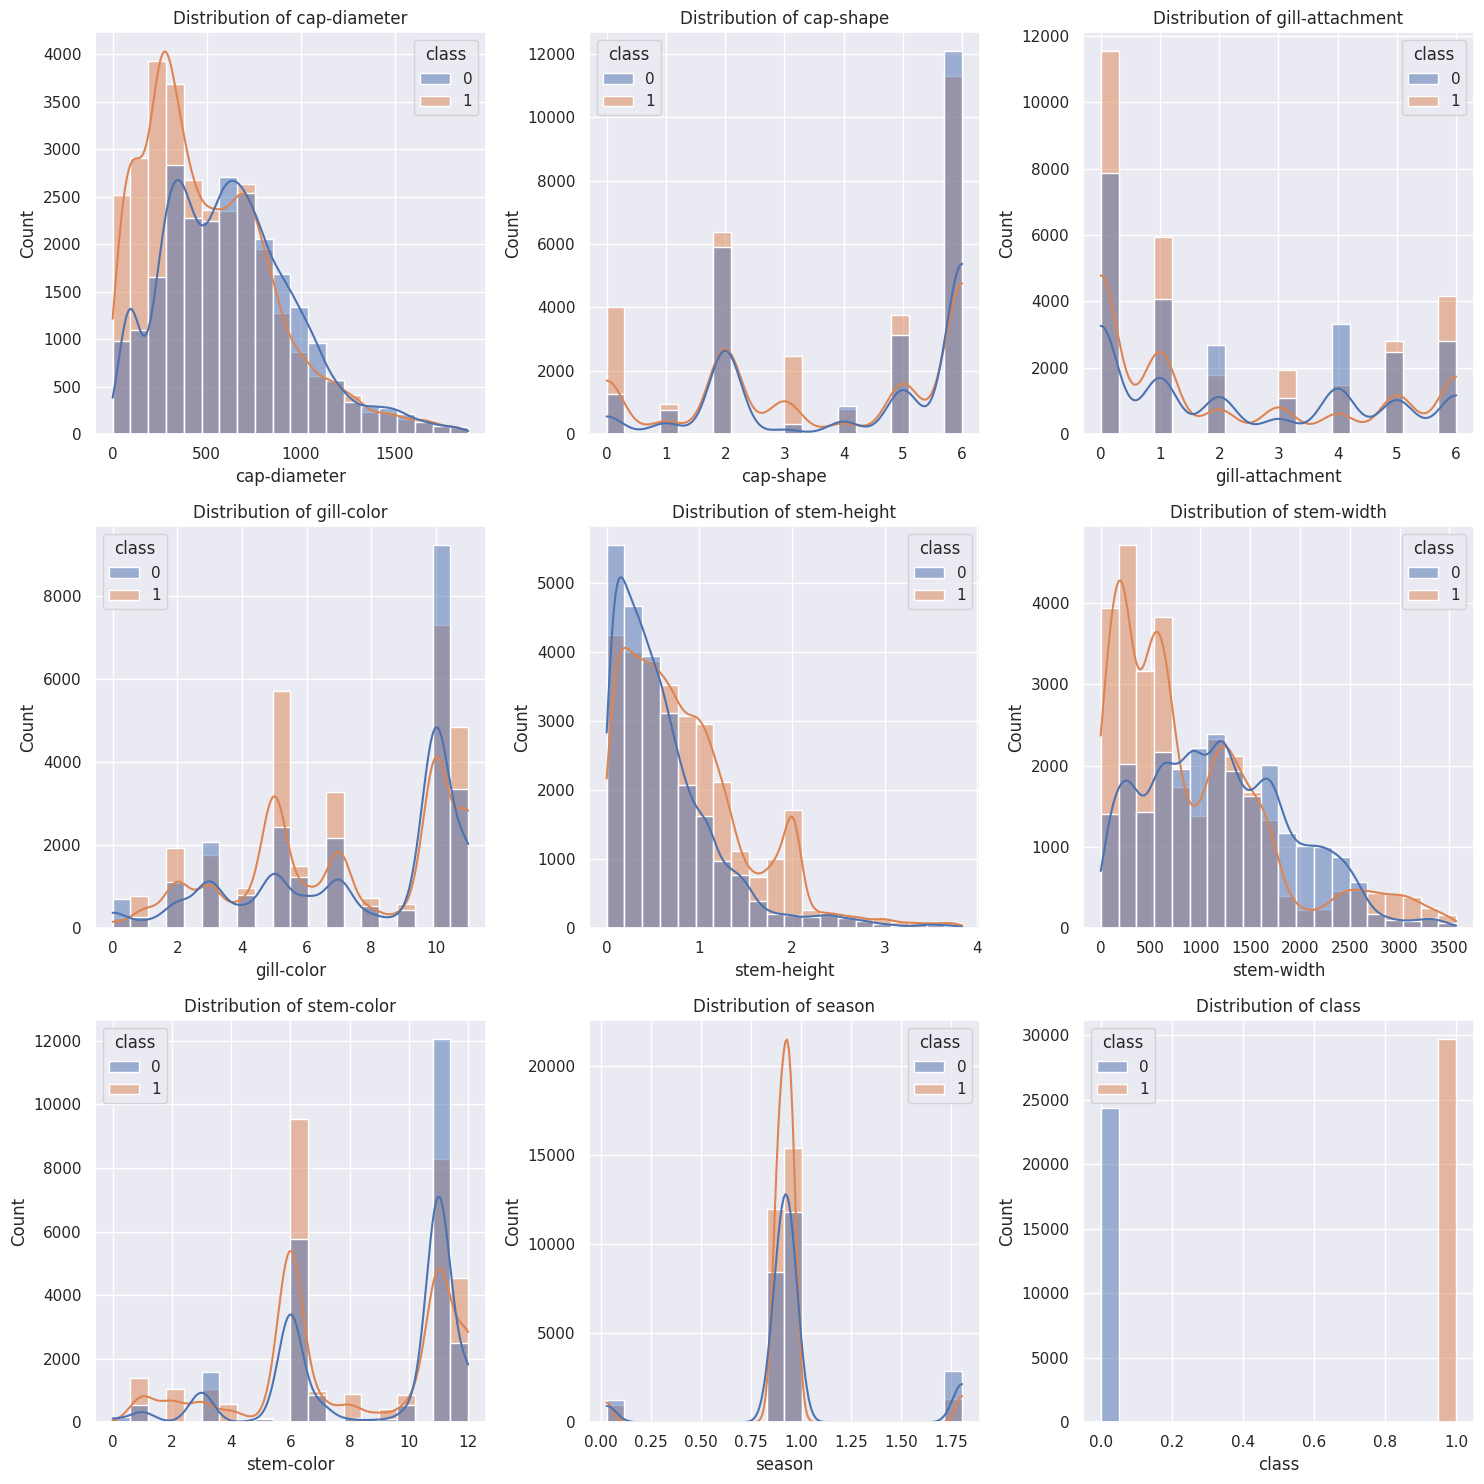

In [ ]:
sns.set()

# Create subplots with 3 columns and 3 rows
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column in the DataFrame
for i, column in enumerate(df.columns):
    # Create a histogram plot for the current column with hue
    sns.histplot(data=df, x=column, hue='class', kde=True, bins=20, ax=axes[i])

    # Set title for the plot
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Display the plot
plt.show()

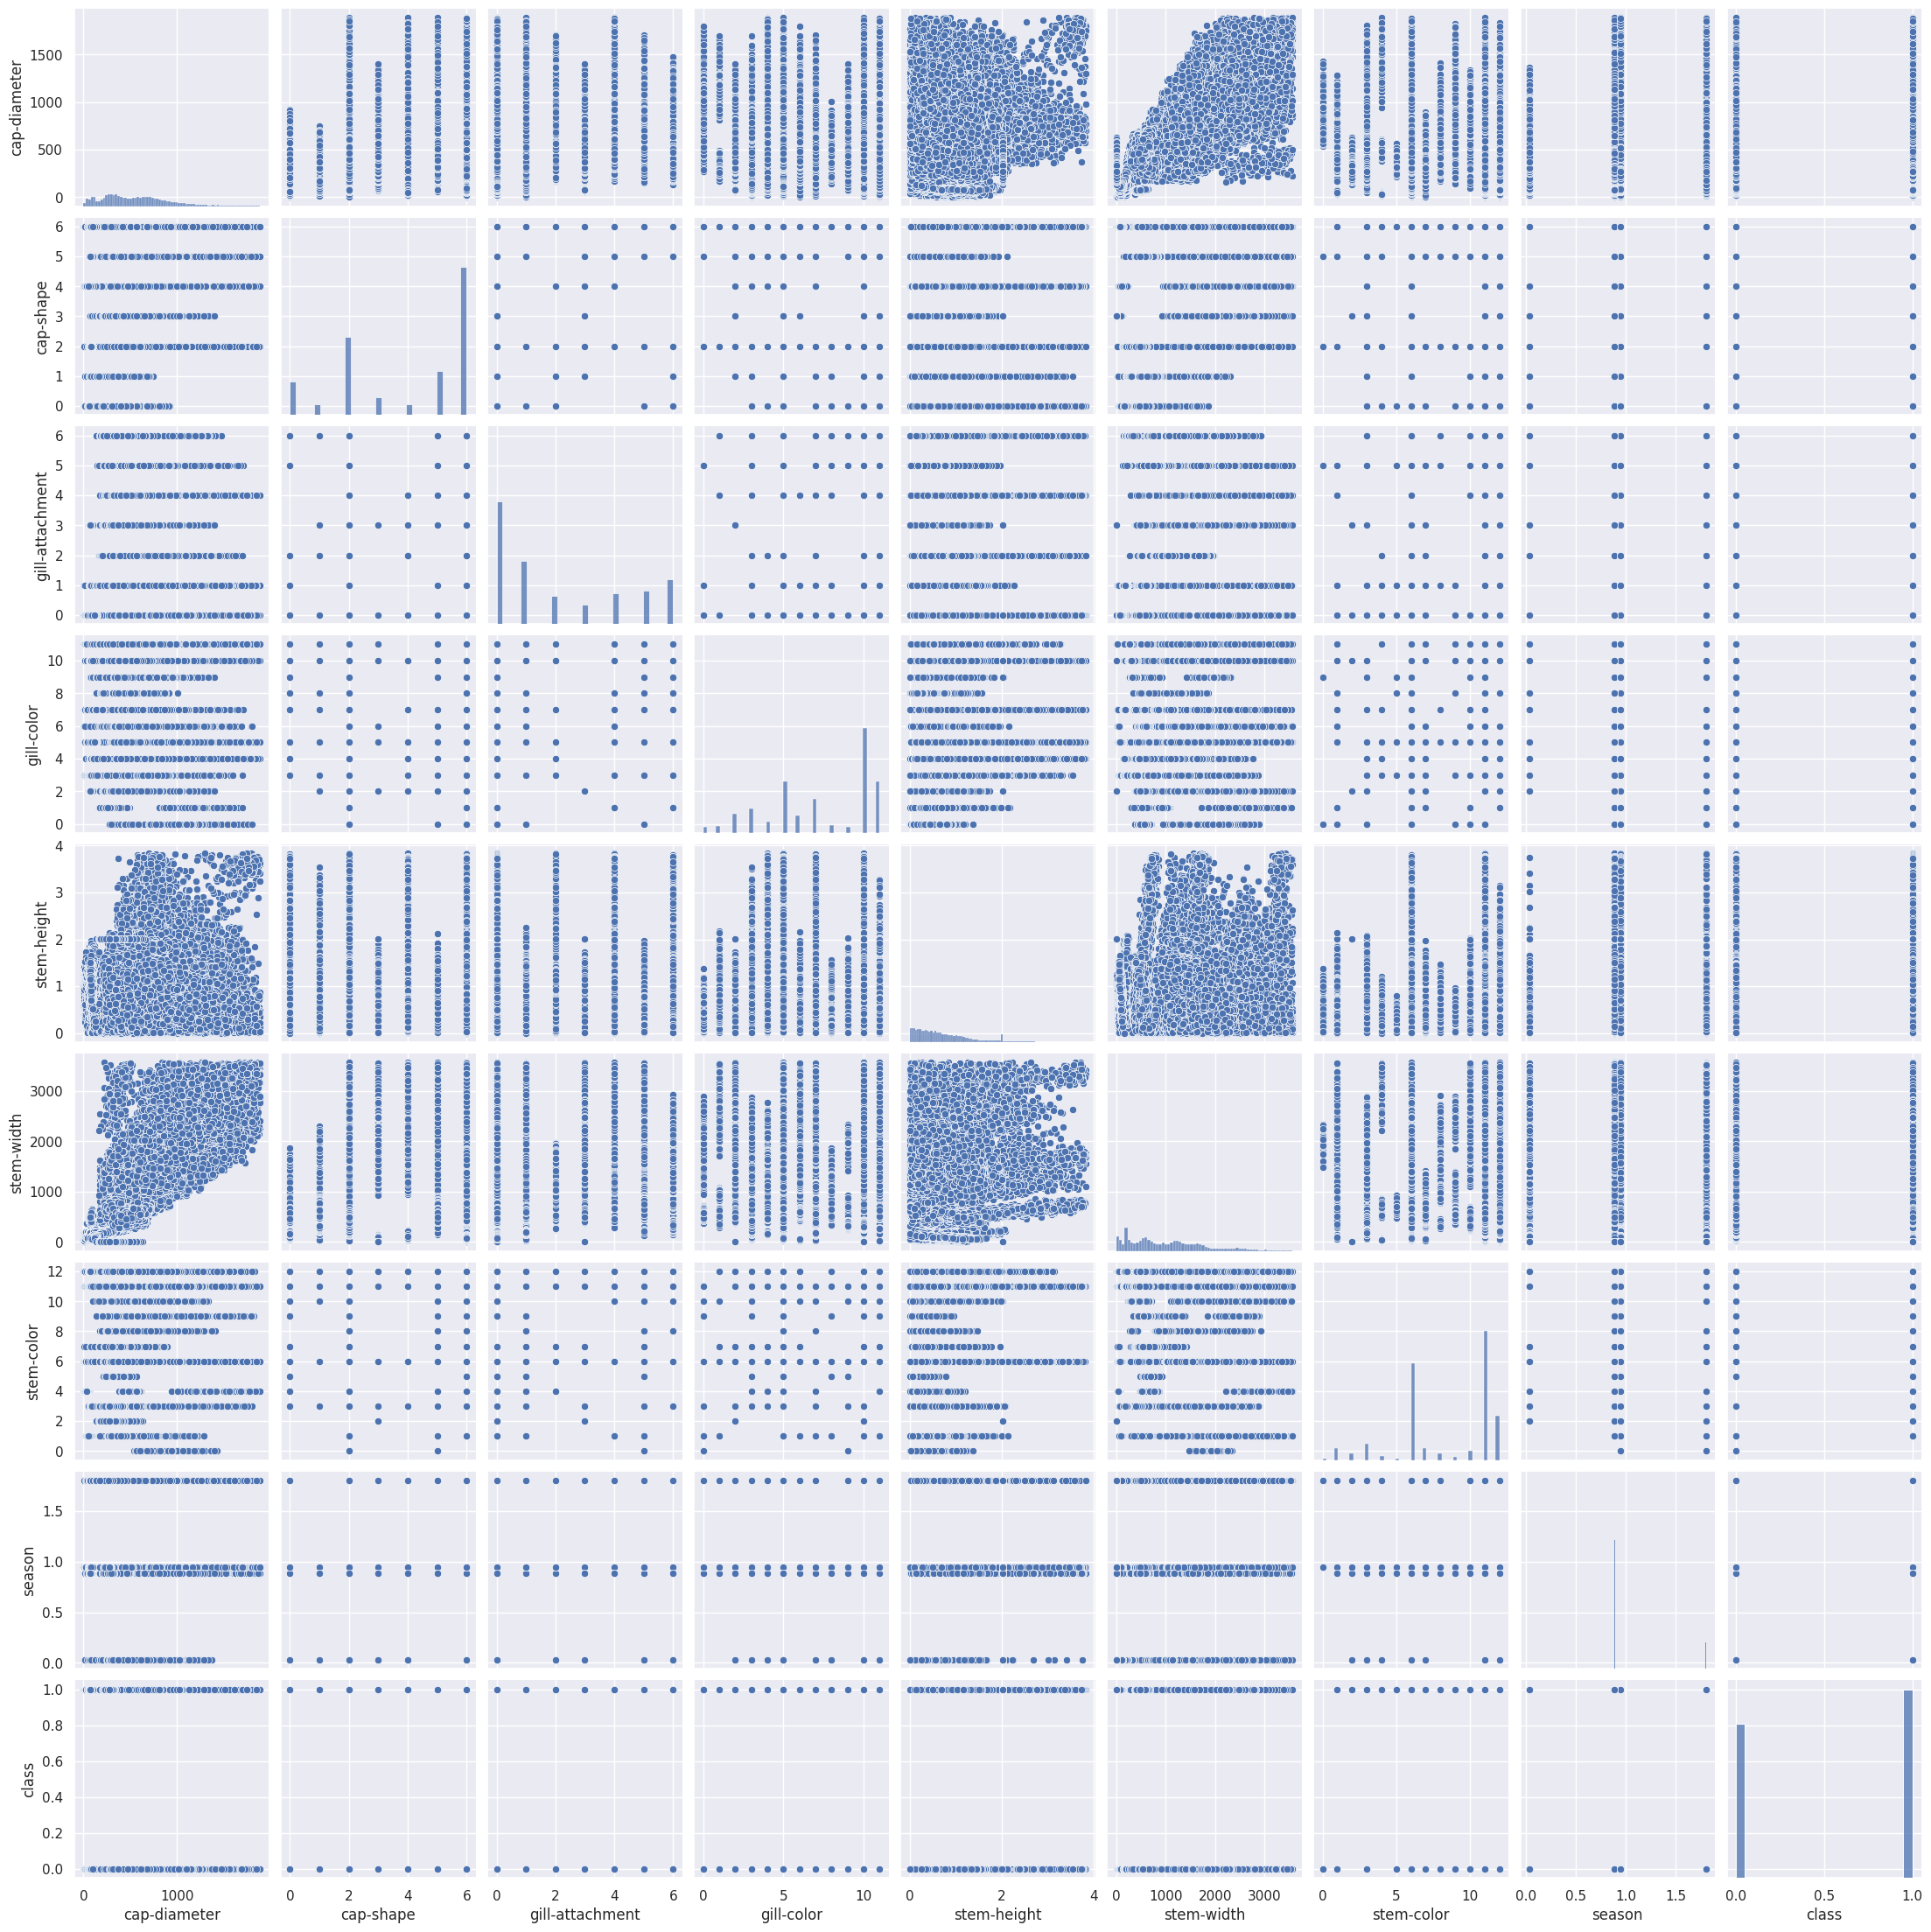

In [ ]:
sns.pairplot(df)

In [ ]:
df['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

Дисбаланса классов нет. Кодирование категориальных признаков производить не нужно, так как они уже закодированы числами

# Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
sc = MinMaxScaler()
data = df.copy()

x = df.drop(columns=['class'])
scale_cols = list(x.columns)

In [ ]:
sc_data = sc.fit_transform(df[scale_cols])

# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc_data[:,i]

data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class,cap-diameter_scaled,cap-shape_scaled,gill-attachment_scaled,gill-color_scaled,stem-height_scaled,stem-width_scaled,stem-color_scaled,season_scaled
0,1372,2,2,10,3.807467,1545,11,1.804273,1,0.725542,0.333333,0.333333,0.909091,0.992737,0.432894,0.916667,1.000000
1,1461,2,2,10,3.807467,1557,11,1.804273,1,0.772607,0.333333,0.333333,0.909091,0.992737,0.436257,0.916667,1.000000
2,1371,2,2,10,3.612496,1566,11,1.804273,1,0.725013,0.333333,0.333333,0.909091,0.941896,0.438778,0.916667,1.000000
3,1261,6,2,10,3.787572,1566,11,1.804273,1,0.666843,1.000000,0.333333,0.909091,0.987549,0.438778,0.916667,1.000000
4,1305,6,2,10,3.711971,1464,11,0.943195,1,0.690111,1.000000,0.333333,0.909091,0.967835,0.410199,0.916667,0.515404


In [ ]:
corr_cols_1 = list(df.columns)
corr_cols_1

['cap-diameter',
 'cap-shape',
 'gill-attachment',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-color',
 'season',
 'class']

In [ ]:
corr_cols_2 = [y+'_scaled' for y in x.columns] + ['class']
corr_cols_2

['cap-diameter_scaled',
 'cap-shape_scaled',
 'gill-attachment_scaled',
 'gill-color_scaled',
 'stem-height_scaled',
 'stem-width_scaled',
 'stem-color_scaled',
 'season_scaled',
 'class']

# Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.

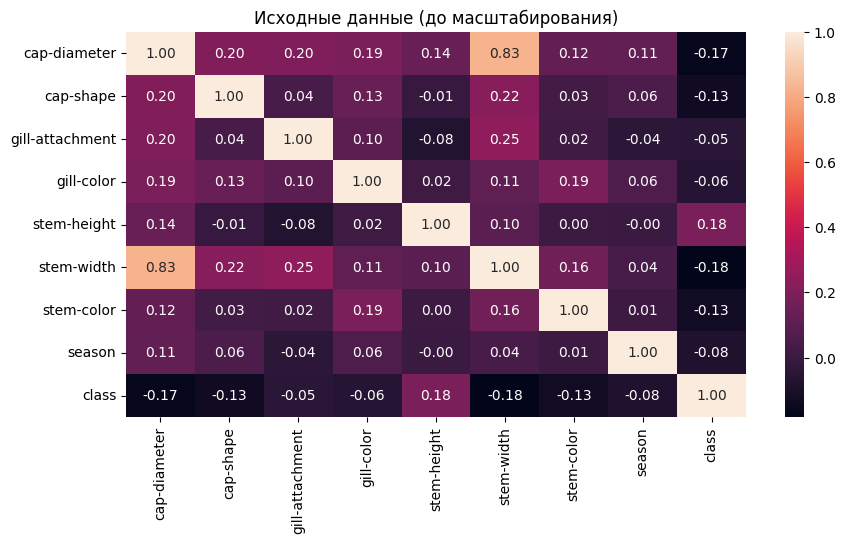

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

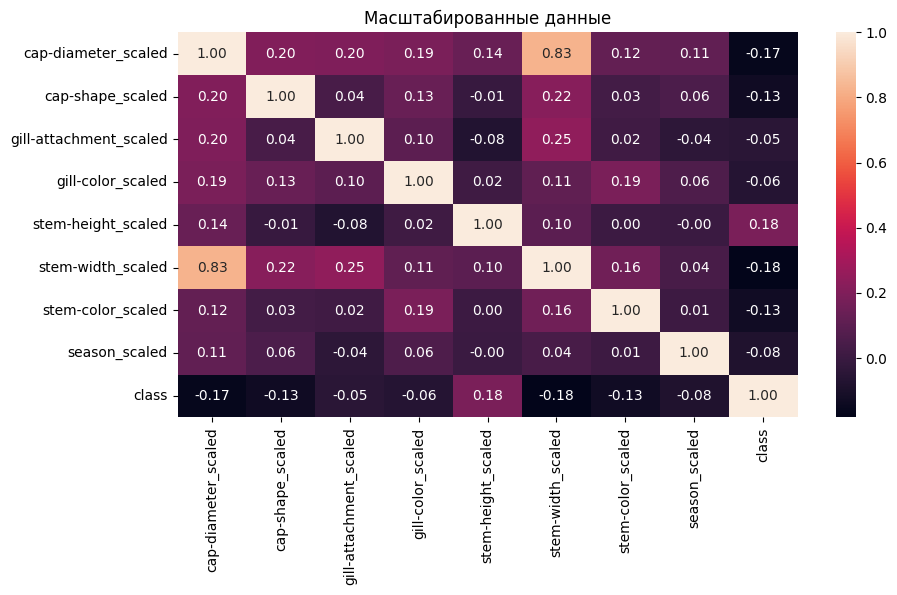

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

# Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.



Так как наша цель определить относится ли гриб к ядовитым, то у разных ошибок - разный вес. не так важно пропустить съедобный гриб и отнести его к ядовитым, нежели отнести ядовитый к съедобным. Получаем, что метрика ```accuracy``` нам не подходит, так как не учитывает вес ошибки. Возьмём метрику ```recall ```, так как она учитывает количество False Negative(на ядовитый гриб моделька выдала результат съедобный). Также можем взять метрику ```precision```, чтобы увидеть долю истинных срабатываний от общего числа срабатываний.

**Выбор наиболее подходящих моделей для решения задачи классификации**


Для задачи классификации будем использовать следующие модели:

1. Логистическая регрессия
2. Метод ближайших соседей
4. Решающее дерево
5. Случайный лес
6. Градиентный бустинг

# Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [ ]:
from sklearn.model_selection import train_test_split

y = data['class']
x = data[[y+'_scaled' for y in x.columns]]
x

,cap-diameter_scaled,cap-shape_scaled,gill-attachment_scaled,gill-color_scaled,stem-height_scaled,stem-width_scaled,stem-color_scaled,season_scaled
0,0.725542,0.333333,0.333333,0.909091,0.992737,0.432894,0.916667,1.000000
1,0.772607,0.333333,0.333333,0.909091,0.992737,0.436257,0.916667,1.000000
2,0.725013,0.333333,0.333333,0.909091,0.941896,0.438778,0.916667,1.000000
3,0.666843,1.000000,0.333333,0.909091,0.987549,0.438778,0.916667,1.000000
4,0.690111,1.000000,0.333333,0.909091,0.967835,0.410199,0.916667,0.515404
...,...,...,...,...,...,...,...,...
54030,0.038604,0.833333,0.500000,0.181818,0.231379,0.159428,1.000000,0.515404
54031,0.043363,0.333333,0.500000,0.181818,0.309197,0.137293,1.000000,0.515404
54032,0.043363,0.833333,0.500000,0.181818,0.238642,0.163631,1.000000,0.484596
54033,0.041777,0.333333,0.500000,0.181818,0.269769,0.137574,1.000000,0.484596


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2)

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Модели
clas_models = {'LogR': LogisticRegression(),
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
              #  'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score,
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [ ]:
class MetricLogger:

    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = pd.concat([self.df, pd.DataFrame(temp)], ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values

    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5,
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

# Сохранение метрик


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 36.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt1



def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_train, Y_train)
    # Предсказание значений
    Y_pred = model.predict(X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]

    precision = precision_score(Y_test.values, Y_pred)
    recall = recall_score(Y_test.values, Y_pred)
    f1 = f1_score(Y_test.values, Y_pred)
    roc_auc = roc_auc_score(Y_test.values, Y_pred_proba)

    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))
    draw_roc_curve(Y_test.values, Y_pred_proba, ax[0])


    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test.values, y_pred)

# Create the display object
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'],)
    cm_display.plot(ax=ax[1], cmap=plt.cm.Blues)
    fig.suptitle(model_name)
    plt.show()

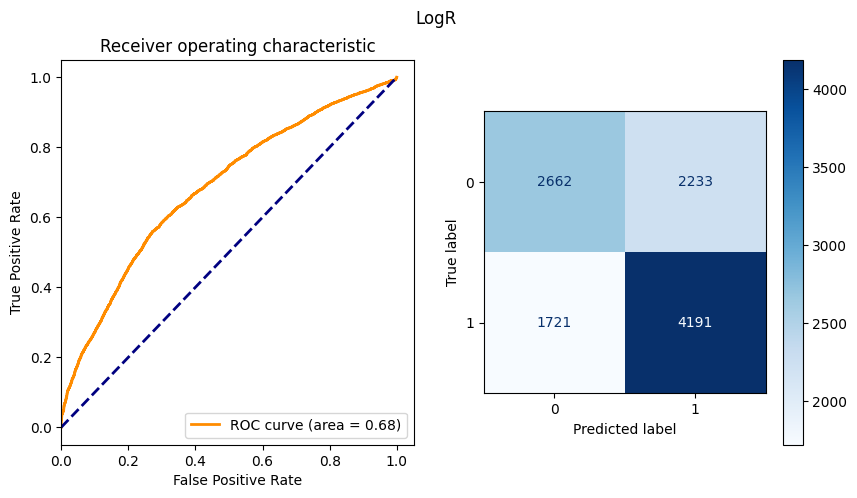

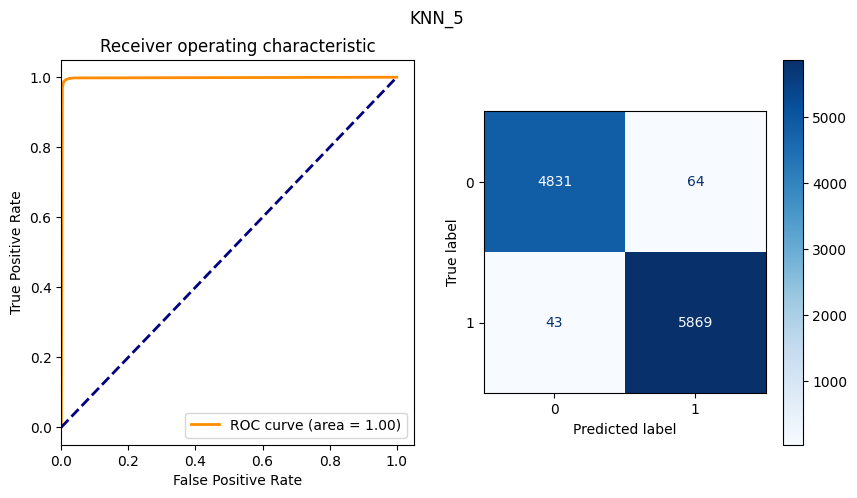

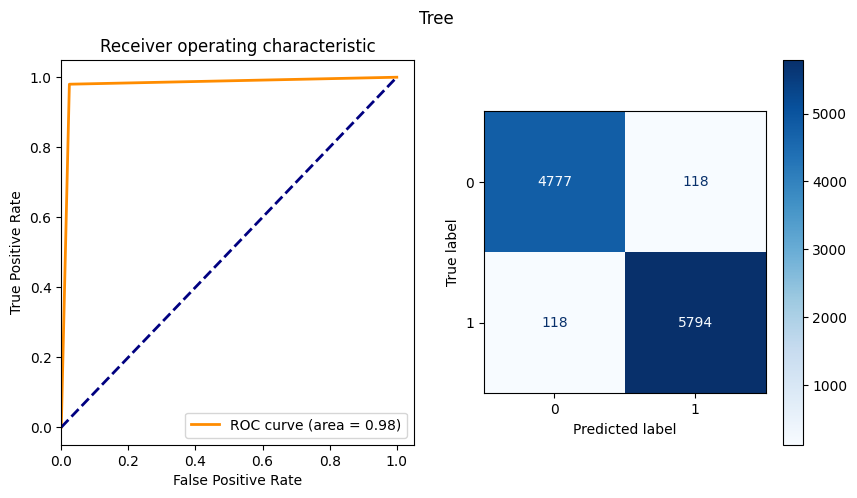

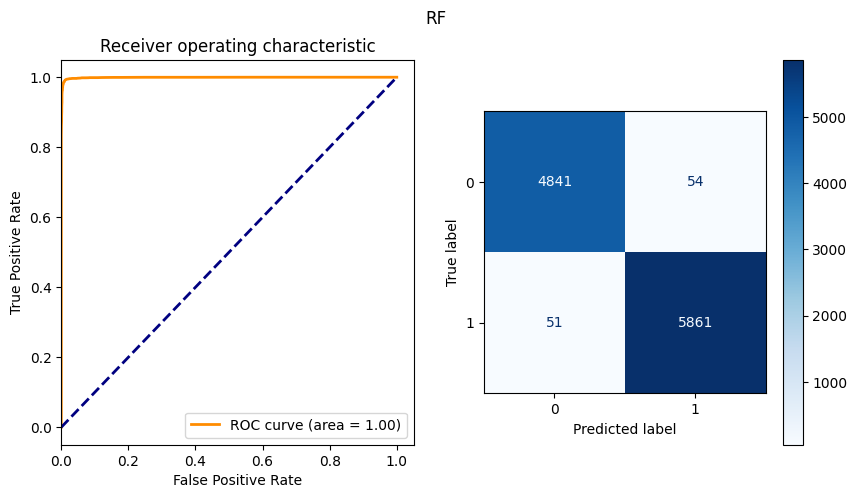

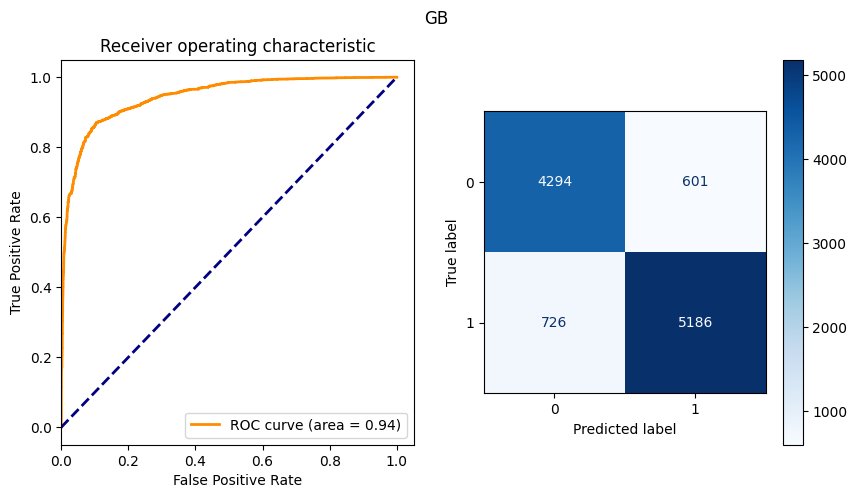

In [ ]:
clasMetricLogger = MetricLogger()

for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

# Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [ ]:
X_train.shape

(43228, 8)

In [ ]:
n_range_list = list(range(0,50,5))
n_range_list[0] = 1

In [ ]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  5, 10, 15, 20, 25, 30, 35, 40, 45])}]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  5, 10, 15, 20, 25, 30, 35, 40, 45])}],
             scoring='roc_auc')

In [ ]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=20)

In [ ]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 20}

In [ ]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'15'

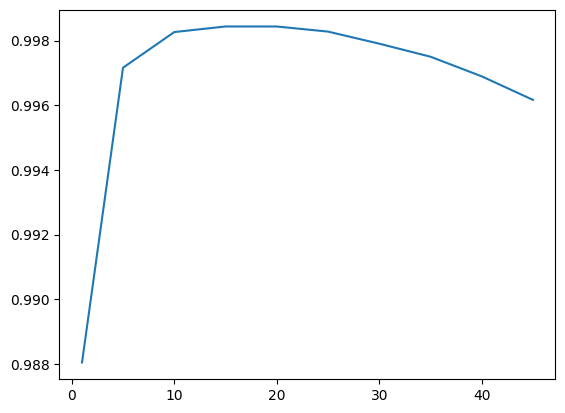

In [ ]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

# Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.



In [ ]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5),
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

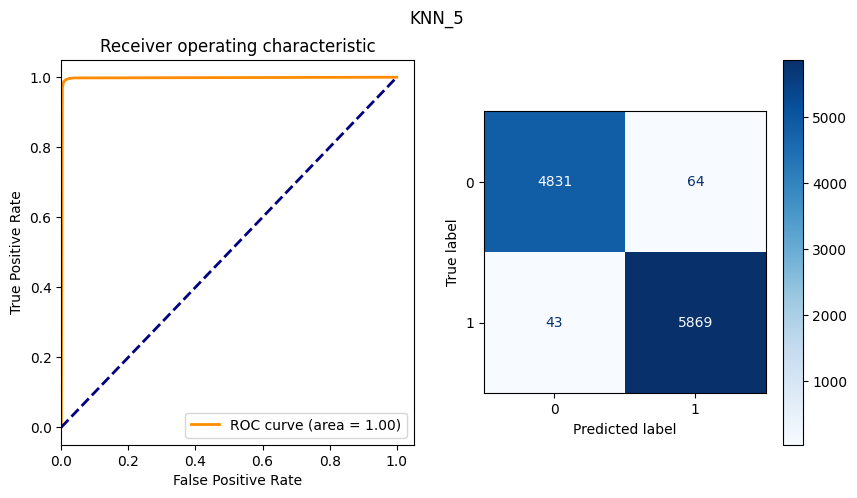

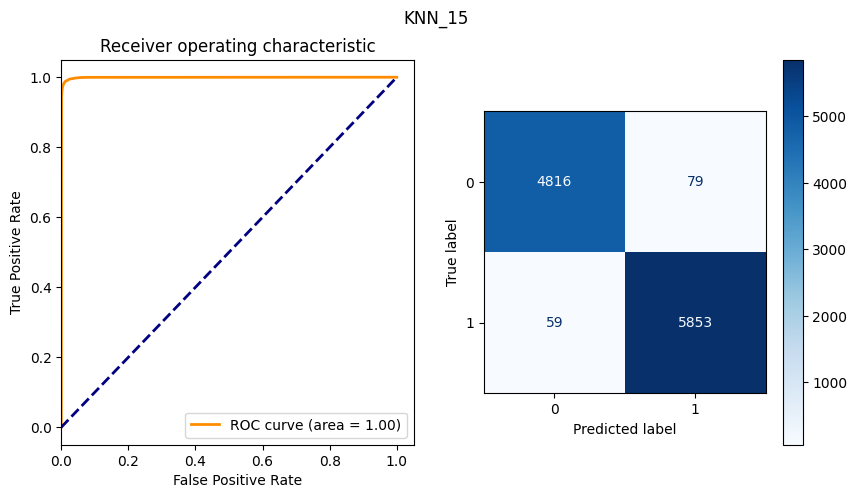

In [ ]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

# Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [ ]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

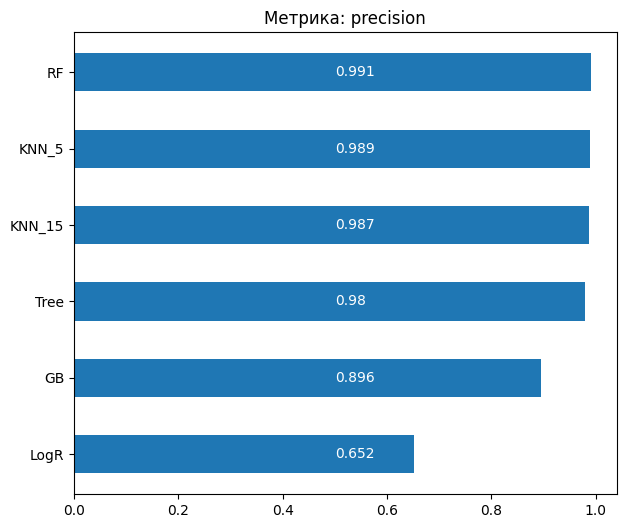

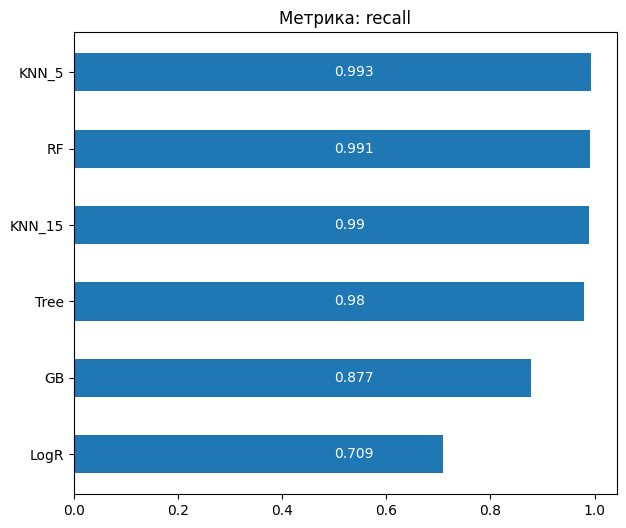

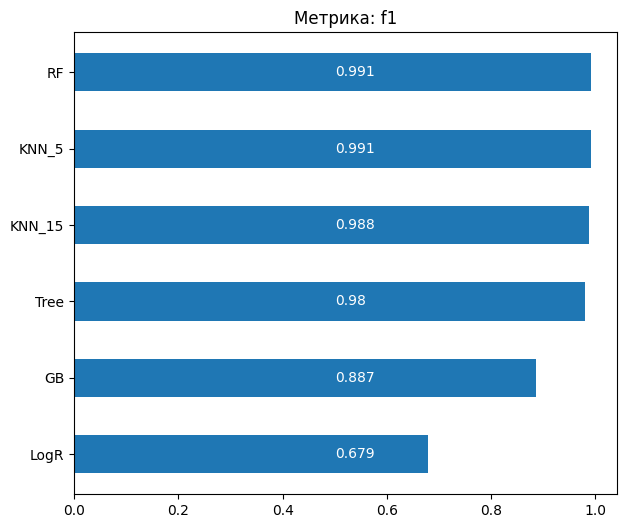

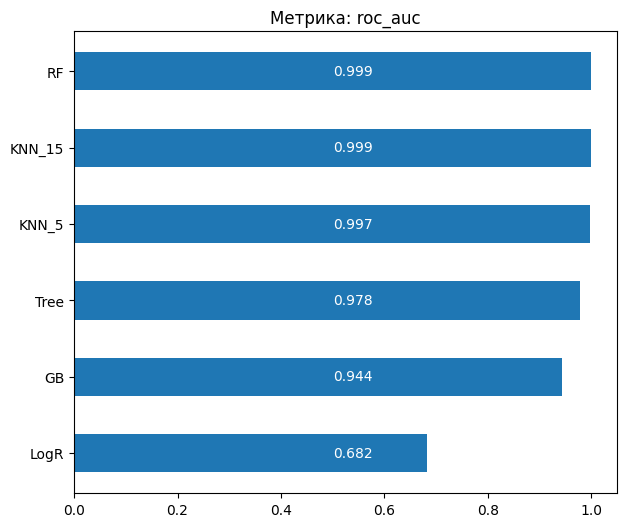

In [ ]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

Лучше всего себя показали модели RandomForest и KNN_5 (k Nearest Neighbor)